In [1]:
%matplotlib inline
from genetic.ecosystem import Ecosystem, easy_individual

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_random_articles(n_articles):
    max_weight = 100
    max_value = 100
    return max_weight * np.random.rand(n_articles), max_value * np.random.rand(n_articles)


def get_capacity(weights):
    return weights.sum() / 3

In [3]:
n_articles = 100


weights, values = get_random_articles(n_articles)
sack_capacity = get_capacity(weights)

model = easy_individual([bool] * n_articles)


def fitness_func(articles_mask):
    if sack_capacity <= weights[articles_mask].sum():
        return values[articles_mask].sum()
    return 0

1702.957690410769
33.33333333333333


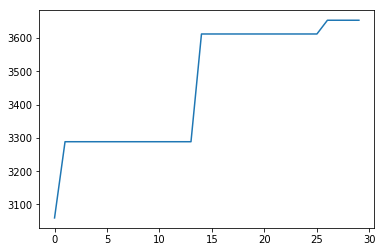

In [4]:
n_individuals = 20

eco = Ecosystem(model_genome=model,
                n_individuals=n_individuals,
                fitness_function=fitness_func,
                mutation_probability=0.2,
                elitism=1)

eco.nth_generation(30)

print("Expected value with no optimization=", sack_capacity * values.sum() / weights.sum())
print(eco.history)

plt.plot(list(eco.history.max()))